# STUDENT ADMISSION PREDICTION

# PROBLEM DESCRIPTION :

Once if the students completed their higher schoolings they are asked to 
complete their graduation, there are different branches and that would be varied according to the students wish and goal. Most of the schools will not encourage their students to participate in sports and other activities. 
Education means not only graduating but also making a student or a person fit for the society, apart from studies there is a major sector which plays a important role for the students is sports. This analysis is made to predict average accuracy of a sportsmen to get admission in a college according to the certification and marks he scored in his schoolings. 


# IMPORTING LIBRARIES 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Importing Dataset From Database Using SQL

In [15]:
import mysql.connector as mysql

In [16]:
db=mysql.connect(host="localhost",user="root",password="Raghu@123",database="capstone", auth_plugin='mysql_native_password')

In [17]:
print(db)

In [18]:
myc=db.cursor()
myc=db.cursor(buffered=True, dictionary=True)

In [19]:
myc.execute('SELECT * FROM capstone.`final csv`')

In [20]:
df=pd.DataFrame(myc.fetchall())

In [21]:
df

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
0,19,0,69,BELOW AVERAGE,NO,FEMALE,0
1,19,1,87,GOOD,NO,MALE,1
2,21,0,76,MODERATE,NO,MALE,0
3,21,0,69,BELOW AVERAGE,NO,FEMALE,0
4,24,1,87,GOOD,NO,FEMALE,1
...,...,...,...,...,...,...,...
537,24,1,69,GOOD,YES,MALE,1
538,24,0,68,BELOW AVERAGE,NO,MALE,0
539,22,1,75,GOOD,YES,MALE,1
540,23,0,80,MODERATE,YES,MALE,0


In [22]:
df.head()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
0,19,0,69,BELOW AVERAGE,NO,FEMALE,0
1,19,1,87,GOOD,NO,MALE,1
2,21,0,76,MODERATE,NO,MALE,0
3,21,0,69,BELOW AVERAGE,NO,FEMALE,0
4,24,1,87,GOOD,NO,FEMALE,1


In [23]:
df['POSSIBILITY_OF_ADMISSION'].value_counts().unique()

array([271], dtype=int64)

In [24]:
df.shape

(542, 7)

# CHECKING FOR NULL VALUES


In [25]:
df.sum().isna()

AGE                         False
SPORT_PARTICIPANT           False
EDUCATIONAL_PERCENTAGE      False
FITNESS                     False
HANDICAP                    False
SEX                         False
POSSIBILITY_OF_ADMISSION    False
dtype: bool

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AGE                       542 non-null    int64 
 1   SPORT_PARTICIPANT         542 non-null    int64 
 2   EDUCATIONAL_PERCENTAGE    542 non-null    int64 
 3   FITNESS                   542 non-null    object
 4   HANDICAP                  542 non-null    object
 5   SEX                       542 non-null    object
 6   POSSIBILITY_OF_ADMISSION  542 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 29.8+ KB


In [27]:
df.isna()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
537,False,False,False,False,False,False,False
538,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False
540,False,False,False,False,False,False,False


In [28]:
df.count().isna()

AGE                         False
SPORT_PARTICIPANT           False
EDUCATIONAL_PERCENTAGE      False
FITNESS                     False
HANDICAP                    False
SEX                         False
POSSIBILITY_OF_ADMISSION    False
dtype: bool

# DATA PREPROCESSING


In [29]:
df['AGE'].value_counts()

22    111
24     98
21     88
23     86
19     83
20     76
Name: AGE, dtype: int64

In [30]:
df['SPORT_PARTICIPANT'].value_counts()

0    326
1    216
Name: SPORT_PARTICIPANT, dtype: int64

In [31]:
df['EDUCATIONAL_PERCENTAGE'].value_counts()

87    23
90    22
85    22
94    20
71    19
95    18
78    17
73    17
69    16
59    16
62    16
77    15
75    15
93    15
76    15
61    14
91    13
92    12
79    12
64    12
68    12
70    12
66    12
56    12
51    12
65    11
57    11
50    11
52    11
58    11
86    10
89    10
88     9
54     9
67     8
55     8
74     8
80     8
60     8
72     8
53     8
63     4
Name: EDUCATIONAL_PERCENTAGE, dtype: int64

In [32]:
df['FITNESS'].value_counts()

GOOD             215
BELOW AVERAGE    164
MODERATE         163
Name: FITNESS, dtype: int64

In [33]:
df['HANDICAP'].value_counts()

NO     493
YES     49
Name: HANDICAP, dtype: int64

In [34]:
df['SEX'].value_counts()

MALE      299
FEMALE    243
Name: SEX, dtype: int64

In [35]:
df['POSSIBILITY_OF_ADMISSION'].value_counts()

0    271
1    271
Name: POSSIBILITY_OF_ADMISSION, dtype: int64

In [36]:
df1=df

# CONVERTING NON-NUMERICAL DATA INTO CATEGORICAL NUMBERIC DATA

In [37]:
df1['FITNESS']=df1['FITNESS'].astype('category')
df1['FITNESS']=df1['FITNESS'].cat.reorder_categories(['GOOD','MODERATE','BELOW AVERAGE'])
df1['FITNESS']=df1['FITNESS'].cat.codes
df1['FITNESS'].value_counts()

0    215
2    164
1    163
Name: FITNESS, dtype: int64

In [38]:
df1['HANDICAP']=df1['HANDICAP'].astype('category')
df1['HANDICAP']=df1['HANDICAP'].cat.reorder_categories(['YES','NO'])
df1['HANDICAP']=df1['HANDICAP'].cat.codes
df1['HANDICAP'].value_counts()

1    493
0     49
Name: HANDICAP, dtype: int64

In [39]:
df1['SEX']=df1['SEX'].astype('category')
df1['SEX']=df1['SEX'].cat.reorder_categories(['MALE','FEMALE'])
df1['SEX']=df1['SEX'].cat.codes
df1['SEX'].value_counts()

0    299
1    243
Name: SEX, dtype: int64

# EXPLORATORY DATA ANALYSIS


In [40]:
df1

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
0,19,0,69,2,1,1,0
1,19,1,87,0,1,0,1
2,21,0,76,1,1,0,0
3,21,0,69,2,1,1,0
4,24,1,87,0,1,1,1
...,...,...,...,...,...,...,...
537,24,1,69,0,0,0,1
538,24,0,68,2,1,0,0
539,22,1,75,0,0,0,1
540,23,0,80,1,0,0,0


In [41]:
df1.describe()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,21.618081,0.398524,73.562731,0.905904,0.909594,0.448339,0.500000
std,1.686054,0.490047,13.617658,0.831675,0.287027,0.497783,0.500462
min,19.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,62.000000,0.000000,1.000000,0.000000,0.000000
50%,22.000000,0.000000,73.000000,1.000000,1.000000,0.000000,0.500000
75%,23.000000,1.000000,87.000000,2.000000,1.000000,1.000000,1.000000
max,24.000000,1.000000,95.000000,2.000000,1.000000,1.000000,1.000000


In [42]:
df1.corr()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
AGE,1.000000,0.045849,0.025237,-0.046766,-0.006547,-0.066498,0.055860
SPORT_PARTICIPANT,0.045849,1.000000,0.706447,-0.882922,-0.006207,0.061822,0.738619
EDUCATIONAL_PERCENTAGE,0.025237,0.706447,1.000000,-0.618614,0.023444,0.090601,0.549908
FITNESS,-0.046766,-0.882922,-0.618614,1.000000,0.010758,-0.049715,-0.668366
HANDICAP,-0.006547,-0.006207,0.023444,0.010758,1.000000,-0.000406,-0.006434
SEX,-0.066498,0.061822,0.090601,-0.049715,-0.000406,1.000000,0.040809
POSSIBILITY_OF_ADMISSION,0.055860,0.738619,0.549908,-0.668366,-0.006434,0.040809,1.000000


In [43]:
df.columns

Index(['AGE', 'SPORT_PARTICIPANT', 'EDUCATIONAL_PERCENTAGE', 'FITNESS',
       'HANDICAP', 'SEX', 'POSSIBILITY_OF_ADMISSION'],
      dtype='object')

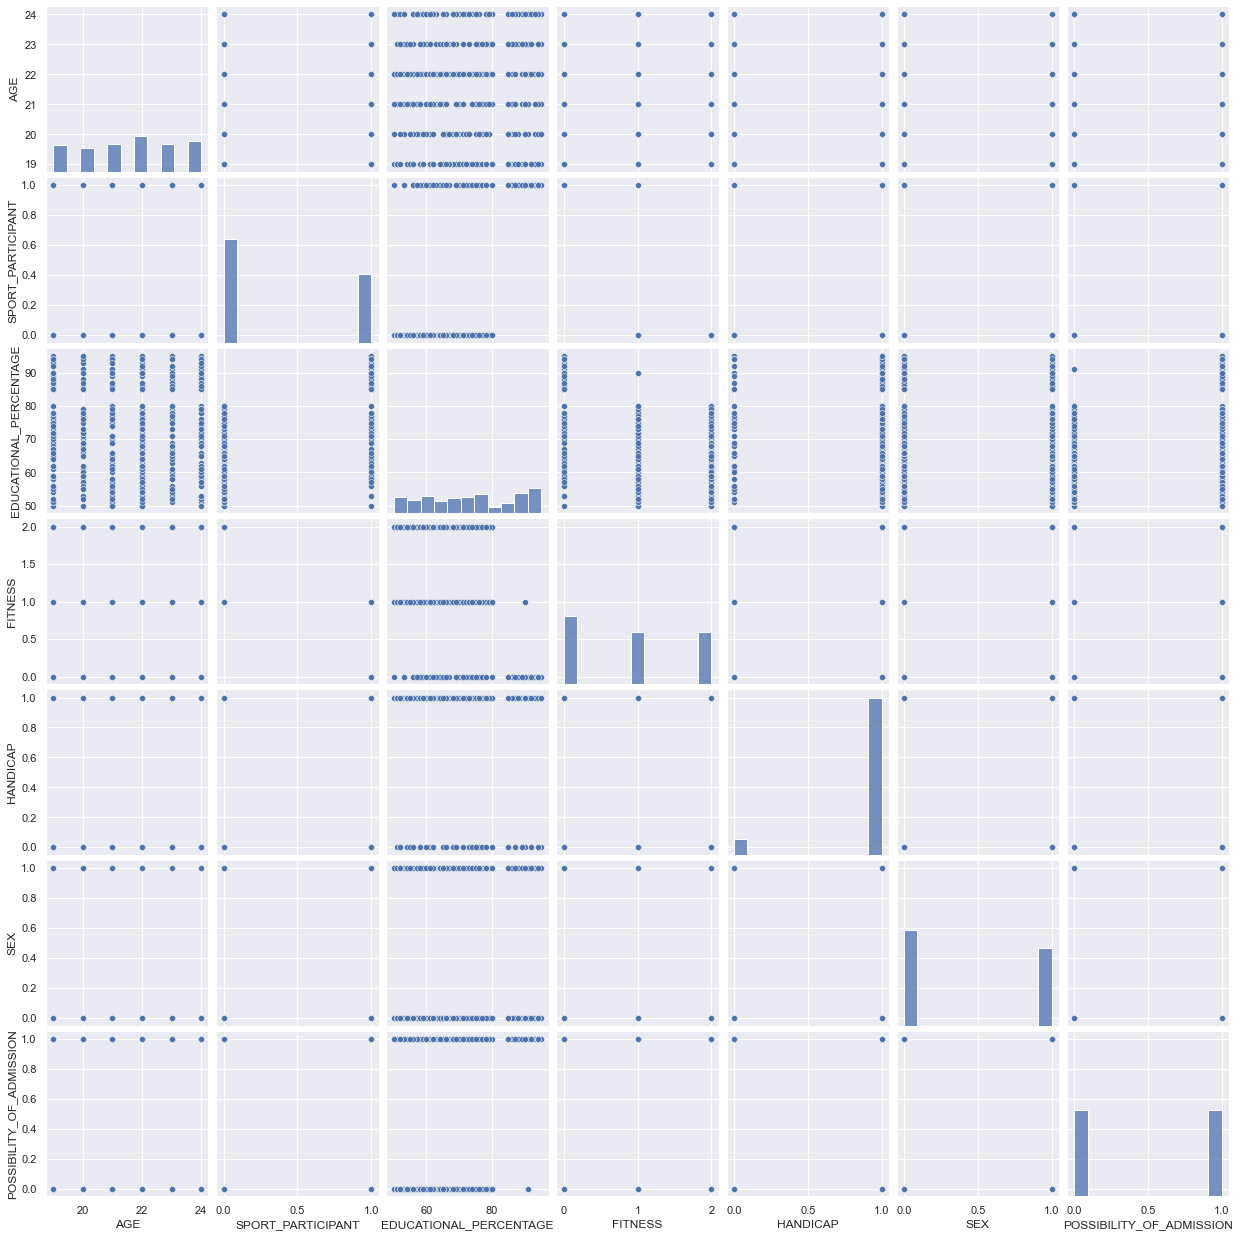

In [124]:
sns.pairplot(df)

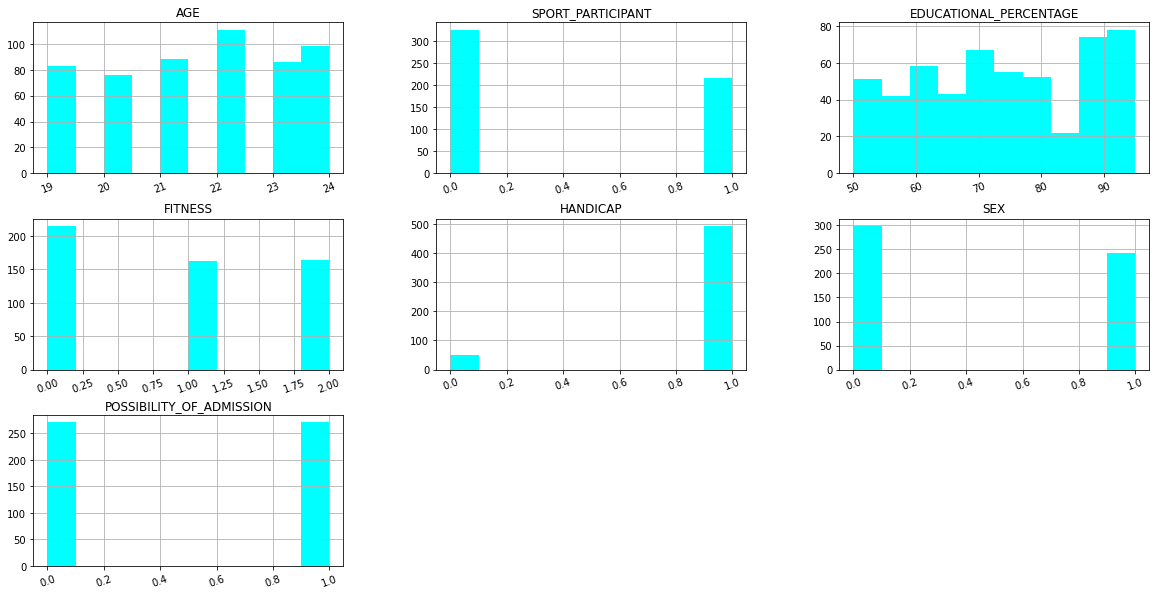

In [44]:
df.hist(xrot=20,figsize=(20,10),color = "cyan")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


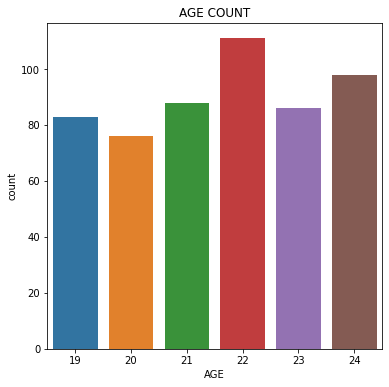

In [45]:
sns.countplot(df['AGE'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('AGE COUNT')
plt.show()
warnings.filterwarnings('ignore')

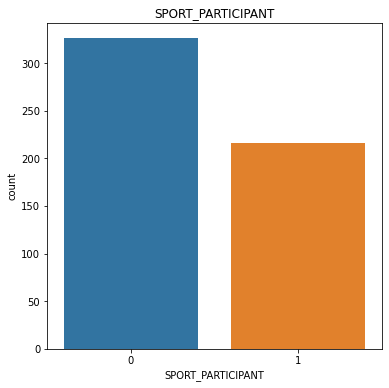

In [46]:
sns.countplot(df['SPORT_PARTICIPANT'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('SPORT_PARTICIPANT')
plt.show()
warnings.filterwarnings('ignore')

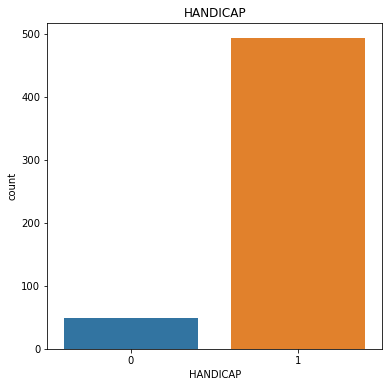

In [47]:
sns.countplot(df['HANDICAP'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('HANDICAP')
plt.show()
warnings.filterwarnings('ignore')

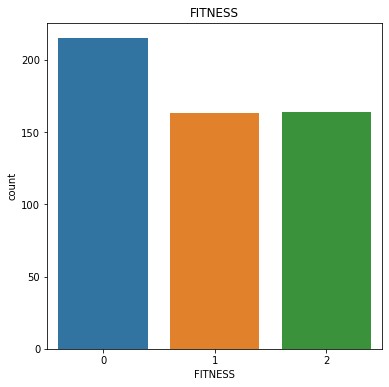

In [48]:
sns.countplot(df['FITNESS'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('FITNESS')
plt.show()
warnings.filterwarnings('ignore')

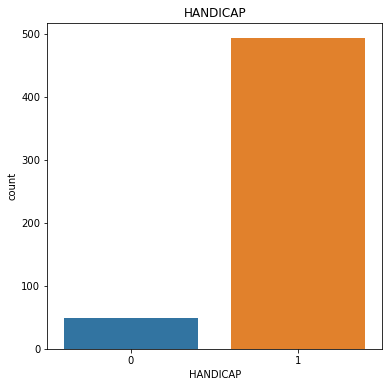

In [49]:
sns.countplot(df['HANDICAP'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('HANDICAP')
plt.show()
warnings.filterwarnings('ignore')

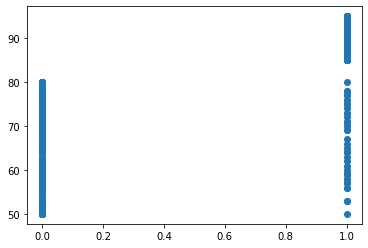

In [50]:
plt.scatter(df['SPORT_PARTICIPANT'],df['EDUCATIONAL_PERCENTAGE'])

# Splitting Attributes

In [51]:
x=df.drop(['POSSIBILITY_OF_ADMISSION'],axis=1)
y=df['POSSIBILITY_OF_ADMISSION']

xtrain, xtest, ytrain, ytest=tts(x,y,test_size=.2,random_state=0)

# MODEL SELECTION

# 1) Desision Tree Model

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
m=DecisionTreeClassifier()
m.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [54]:
p=m.predict(xtest)

In [55]:
m.predict_proba(xtest)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [56]:
accuracy_score(ytest,p)

0.8165137614678899

In [57]:
m.score(xtrain, ytrain)

0.9630484988452656

Text(0.5, 15.0, 'Predicted Value')

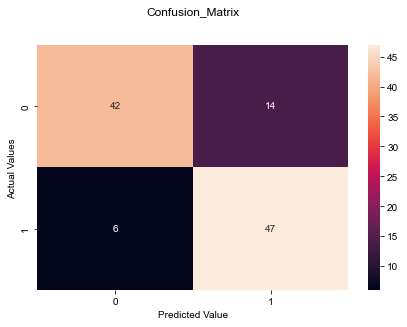

In [58]:
cm=confusion_matrix(ytest,p)
sns.heatmap(pd.DataFrame(cm),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [59]:
z=classification_report(ytest,p)
print(z)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        56
           1       0.77      0.89      0.82        53

    accuracy                           0.82       109
   macro avg       0.82      0.82      0.82       109
weighted avg       0.82      0.82      0.82       109



# Applying Hyper Parameter Tunning

# Grid Search CV

In [60]:
dg={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [61]:
from sklearn.model_selection import GridSearchCV
gsd= GridSearchCV(estimator=m,
                     param_grid=dg,
                     cv=5,
                    n_jobs =2, verbose=1)

In [62]:
gsd.fit(xtrain,ytrain)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [63]:
bpd= gsd.best_params_
print(bpd)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'random'}


In [64]:
gsd.best_score_

0.8661053194333066

In [65]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf= 1, min_samples_split= 2, splitter ='best')
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=25)

# 2) Random Forest Model

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rm=RandomForestClassifier()
rm.fit(xtrain, ytrain)

RandomForestClassifier()

In [68]:
rp=rm.predict(xtest)

In [69]:
rm.predict_proba(xtest)

array([[0.845     , 0.155     ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.475     , 0.525     ],
       [0.82      , 0.18      ],
       [0.46      , 0.54      ],
       [0.005     , 0.995     ],
       [0.80733333, 0.19266667],
       [0.995     , 0.005     ],
       [0.59821429, 0.40178571],
       [0.        , 1.        ],
       [0.97      , 0.03      ],
       [0.65      , 0.35      ],
       [1.        , 0.        ],
       [0.98      , 0.02      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.46      , 0.54      ],
       [0.5475    , 0.4525    ],
       [0.85890476, 0.14109524],
       [0.24604762, 0.75395238],
       [0.4075    , 0.5925    ],
       [1.        , 0.        ],
       [0.98      , 0.02      ],
       [0.888     , 0.112     ],
       [0.97      , 0.03      ],
       [0.        , 1.        ],
       [0.58783333, 0.41216667],
       [0.

In [70]:
accuracy_score(ytest,rp)

0.8440366972477065

In [71]:
rm.score(xtrain, ytrain)

0.9630484988452656

Text(0.5, 3.5, 'Predicted Value')

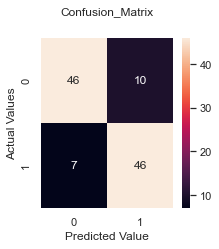

In [72]:
cr=confusion_matrix(ytest,rp)
sns.heatmap(pd.DataFrame(cr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(6,6)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [73]:
z1=classification_report(ytest,rp)
print(z1)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        56
           1       0.82      0.87      0.84        53

    accuracy                           0.84       109
   macro avg       0.84      0.84      0.84       109
weighted avg       0.85      0.84      0.84       109



# Hyper Parameter Tunning

# Grid Search CV

In [74]:
gr = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [75]:
gsr= GridSearchCV(estimator=rm, param_grid=gr, cv= 5)
gsr.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [76]:
bgr= gsr.best_params_
print(bgr)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [77]:
gsr.best_score_

0.8638599304998664

# 3)Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gm=GradientBoostingClassifier()

In [80]:
gm.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [81]:
gp=gm.predict(xtest)

In [82]:
gm.predict_proba(xtest)

array([[0.86178138, 0.13821862],
       [0.00485118, 0.99514882],
       [0.00761108, 0.99238892],
       [0.00461895, 0.99538105],
       [0.22412092, 0.77587908],
       [0.5254701 , 0.4745299 ],
       [0.87675643, 0.12324357],
       [0.00409428, 0.99590572],
       [0.74149019, 0.25850981],
       [0.92184088, 0.07815912],
       [0.50529533, 0.49470467],
       [0.00409428, 0.99590572],
       [0.90245409, 0.09754591],
       [0.887205  , 0.112795  ],
       [0.87161374, 0.12838626],
       [0.87042218, 0.12957782],
       [0.00996238, 0.99003762],
       [0.00448863, 0.99551137],
       [0.00461895, 0.99538105],
       [0.06439481, 0.93560519],
       [0.71023194, 0.28976806],
       [0.6922852 , 0.3077148 ],
       [0.5569192 , 0.4430808 ],
       [0.6480271 , 0.3519729 ],
       [0.89400518, 0.10599482],
       [0.861354  , 0.138646  ],
       [0.69637441, 0.30362559],
       [0.83836519, 0.16163481],
       [0.00461895, 0.99538105],
       [0.66657207, 0.33342793],
       [0.

In [83]:
accuracy_score(ytest,gp)

0.8807339449541285

In [84]:
gm.score(xtrain, ytrain)

0.8868360277136259

Text(0.5, 30.5, 'Predicted Value')

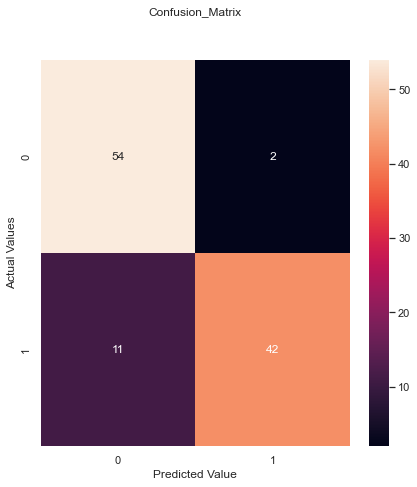

In [85]:
cg=confusion_matrix(ytest,gp)
sns.heatmap(pd.DataFrame(cg),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [86]:
zz=classification_report(ytest,gp)
print(zz)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.95      0.79      0.87        53

    accuracy                           0.88       109
   macro avg       0.89      0.88      0.88       109
weighted avg       0.89      0.88      0.88       109



# 4)Support Vector Machine

In [87]:
from sklearn.svm import SVC

In [88]:
sm=SVC()

In [89]:
sm.fit(xtrain, ytrain)

SVC()

In [90]:
sp=sm.predict(xtest)

In [91]:
accuracy_score(ytest,sp)

0.8532110091743119

In [92]:
sm.score(xtrain, ytrain)

0.7990762124711316

Text(0.5, 3.5, 'Predicted Value')

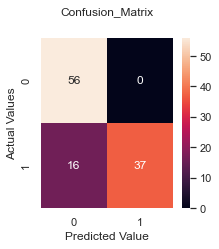

In [93]:
sr=confusion_matrix(ytest,sp)
sns.heatmap(pd.DataFrame(sr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [94]:
z2=classification_report(ytest, sp)
print(z2)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        56
           1       1.00      0.70      0.82        53

    accuracy                           0.85       109
   macro avg       0.89      0.85      0.85       109
weighted avg       0.89      0.85      0.85       109



# 5)KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
km=KNeighborsClassifier()
km.fit(xtrain, ytrain)

KNeighborsClassifier()

In [97]:
kp=km.predict(xtest)

In [98]:
accuracy_score(ytest,kp)

0.8532110091743119

In [99]:
km.score(xtrain, ytrain)

0.8498845265588915

Text(0.5, 3.5, 'Predicted Value')

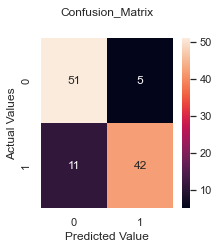

In [100]:
kr=confusion_matrix(ytest,kp)
sns.heatmap(pd.DataFrame(kr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')


In [101]:
zzz=classification_report(ytest, kp)
print(zzz)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        56
           1       0.89      0.79      0.84        53

    accuracy                           0.85       109
   macro avg       0.86      0.85      0.85       109
weighted avg       0.86      0.85      0.85       109



# 6) Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
nm=GaussianNB()

In [104]:
nm.fit(xtrain, ytrain)

GaussianNB()

In [105]:
np=gm.predict(xtest)

In [106]:
accuracy_score(ytest,np)

0.8807339449541285

In [107]:
nm.score(xtrain, ytrain)

0.8568129330254042

Text(0.5, 3.5, 'Predicted Value')

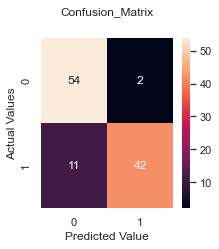

In [108]:
nr=confusion_matrix(ytest,np)
sns.heatmap(pd.DataFrame(nr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [109]:
z3=classification_report(ytest,np)
print(z3)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.95      0.79      0.87        53

    accuracy                           0.88       109
   macro avg       0.89      0.88      0.88       109
weighted avg       0.89      0.88      0.88       109



#  7) Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lm=LogisticRegression()
lm.fit(xtrain, ytrain)

LogisticRegression()

In [112]:
lp=lm.predict(xtest)

In [113]:
accuracy_score(ytest, lp)

0.8807339449541285

In [114]:
lm.score(xtrain, ytrain)

0.8568129330254042

Text(0.5, 3.5, 'Predicted Value')

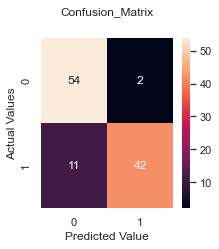

In [115]:
lr=confusion_matrix(ytest,lp)
sns.heatmap(pd.DataFrame(lr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [116]:
z4=classification_report(ytest, lp)
print(z4)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.95      0.79      0.87        53

    accuracy                           0.88       109
   macro avg       0.89      0.88      0.88       109
weighted avg       0.89      0.88      0.88       109



# Accuracy Scores of Different Models

In [117]:
print('Accuracy Score Of Decision Tree Classifier',accuracy_score(ytest,p))
print()
print('Best Score In Grid Search CV after Hyper Parameter Tunning',gsd.best_score_)
print()
print('Accuracy Score Of Random Forest Classifier',accuracy_score(ytest,rp))
print()
print('Best Score In Grid Search CV after Hyper Parameter Tunning',gsr.best_score_)
print()
print('Accuracy Score Of Gradient Boosting Classifier',accuracy_score(ytest,gp))
print()
print('Accuracy Score Of Support Vector Machine',accuracy_score(ytest,sp))
print()
print('Accuracy Score Of KNeighbors Classifier',accuracy_score(ytest,kp))
print()
print('Accuracy Score Of Naive Bayes',accuracy_score(ytest,np))
print()
print('Accuracy Score Of Logistic Regression',accuracy_score(ytest,lp))

Accuracy Score Of Decision Tree Classifier 0.8165137614678899

Best Score In Grid Search CV after Hyper Parameter Tunning 0.8661053194333066

Accuracy Score Of Random Forest Classifier 0.8440366972477065

Best Score In Grid Search CV after Hyper Parameter Tunning 0.8638599304998664

Accuracy Score Of Gradient Boosting Classifier 0.8807339449541285

Accuracy Score Of Support Vector Machine 0.8532110091743119

Accuracy Score Of KNeighbors Classifier 0.8532110091743119

Accuracy Score Of Naive Bayes 0.8807339449541285

Accuracy Score Of Logistic Regression 0.8807339449541285


# Integrating Power BI 

In [1]:
!pip install powerbiclient

In [2]:
from powerbiclient import Report,models

In [3]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication
auth_id=DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code HUT6DBHCY to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [4]:
g_id="8c8b77a1-cdbd-48a9-8d6d-96df6c157851"
r_id="61dccf2c-c577-40b7-8f83-2a418cc28be0"

# POWERBI DASHBOARD

In [5]:
report=Report(group_id = g_id, report_id = r_id, auth = auth_id)
report

Report()